In [ ]:
import pint
from pint import Unit
from scipy import constants
import numpy as np
from matplotlib import pyplot as plt
from open_atmos_jupyter_utils import show_plot
si = pint.UnitRegistry()

## Calculate air density using Perfect Gas Formula
<!-- ![](https://mmerevise.co.uk/app/uploads/2022/09/pVnRT.png) -->

In [71]:
temperature = 300 * si.K
temperature += 3 * si.mK
temperature = (19 + constants.zero_Celsius) * si.K
p = 1000 * si.hPa
gas_constant = constants.R * si.J / si.mol / si.K
Md = 28.966 * si.g / si.mol 

In [72]:
density = p / (gas_constant * temperature) * Md
print(density.check('[density]'))
density.to_base_units()


True


<Quantity(1.19247271, 'kilogram / meter ** 3')>

## Plots

In [73]:
si.setup_matplotlib()

In [74]:
def equilibrium_vapour_pressure(T):
    T_c = T - constants.zero_Celsius * si.K
    return 0.61078 * si.kPa * (np.exp( 17.27 * T_c / (T_c + 237.3 * si.K) ))

print(equilibrium_vapour_pressure((19 + constants.zero_Celsius) * si.K))

2.197321372565163 kilopascal


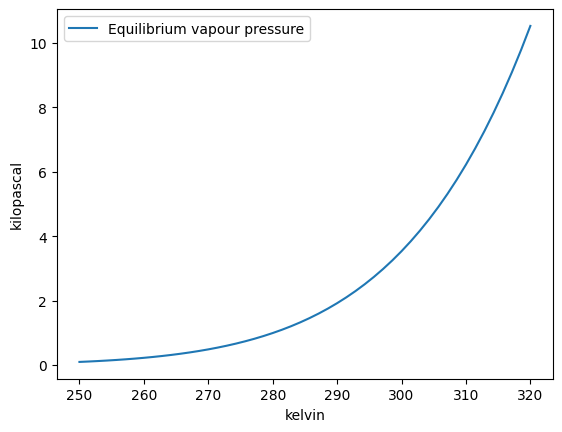

In [ ]:
T = np.linspace(250, 320) * si.K
plt.plot(T, equilibrium_vapour_pressure(T), label='Equilibrium vapour pressure')
plt.legend()
show_plot()